# IBM cloud deployment

#### Team ID - PNT2022TMID44334


# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 40 kB/s /s eta 0:00:01B 15.2 MB/s eta 0:00:34 |████▊                           | 84.6 MB 15.2 MB/s eta 0:00:33 |█████                           | 90.0 MB 15.2 MB/s eta 0:00:33    |█████████▉                      | 177.6 MB 103.6 MB/s eta 0:00:04| 280.1 MB 104.4 MB/s eta 0:00:03/s eta 0:00:03
     |████████████████████████████████| 124 kB 83.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 78.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 83.2 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
   

In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

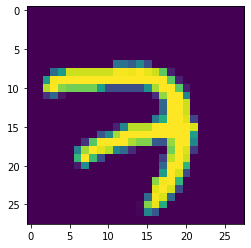

In [6]:
plt.imshow(x_train[5000])     #ploting the index=image

In [7]:
np.argmax(y_train[5000])

0

# Reshaping Dataset

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [11]:
#create model
model=Sequential ()

In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2935 - accuracy: 0.9448 - val_loss: 0.1220 - val_accuracy: 0.9662
Epoch 2/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0787 - accuracy: 0.9761 - val_loss: 0.0876 - val_accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0883 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0853 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0333 - accuracy: 0.9887 - val_loss: 0.1201 - val_accuracy: 0.9739


# Observing the metrics

In [18]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.12009724229574203, 0.9739000201225281]


# Test The Model

In [19]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[1.3093596e-15 1.6657296e-18 1.0302369e-14 6.9182353e-09 3.4993657e-06
  2.2733215e-09 5.9939021e-18 2.8354838e-08 8.0210708e-07 9.9999559e-01]]


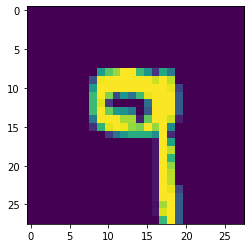

In [22]:
plt.imshow(x_test[6000])

In [23]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [24]:
# Save the model
model.save('models/mnistCNN.h5')

In [25]:
cd models

/home/wsuser/work/models


In [26]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [51]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [53]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"oHvops4PuUNbcBbzCyzOWKSt2bKQVD0bj2EAlZIvrGdv"
}
client = APIClient(credentials)

In [61]:
client = APIClient(credentials)

In [62]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [66]:
space_uid = guid_from_space_name(client,'handwritten digit recognition')
print("Space UID = " + space_uid)

Space UID = 0a096f80-7603-4d8e-be47-c9a264c3b445


In [ ]:
client.set.default_space(space_uid)

In [68]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [69]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [72]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
}

SyntaxError: invalid syntax (3885713015.py, line 6)

In [ ]:
model_id

In [37]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

NameError: name 'client' is not defined

In [ ]:
ls

# TEST MODEL

In [38]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [39]:
model = load_model("mnistCNN.h5")

In [40]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [41]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [42]:
img

In [43]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [44]:
pred = model.predict(im2arr)
print(pred)

[[1.0000000e+00 2.3963600e-15 2.4757642e-12 1.2317031e-13 1.0567615e-17
  1.4570932e-12 7.9845136e-10 4.4574440e-15 6.1912351e-09 2.7461991e-11]]


In [45]:
print(np.argmax(pred, axis=1)) #printing our Labels

[0]
